In [1]:
import pandas as pd
from pandas import read_excel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error 
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing

In [2]:
df_delay=pd.read_csv("../data/DelaysWithAging.csv", sep=",")
df_delay = shuffle(df_delay)
df_delay.head(5)

yrs       temp      pvdd     cload        nbodyn          nsdp  \
8751     1 -24.450685  0.699681  1.232273  9.890000e+21  3.340000e+26   
1951     7 -19.840316  0.692691  0.931748  1.010000e+22  2.910000e+26   
15782    6  50.287073  0.680772  1.281654  1.010000e+22  3.050000e+26   
16385    1 -48.985294  0.693465  0.319665  1.020000e+22  2.980000e+26   
12728    6  81.059227  0.683227  0.643530  1.030000e+22  3.030000e+26   

            nc0subn         toxpn         hfinp       ni0subp  ...  \
8751   2.740000e+25  1.210000e-09  1.780000e-08  1.070000e+16  ...   
1951   2.990000e+25  1.190000e-09  1.790000e-08  1.110000e+16  ...   
15782  2.990000e+25  1.210000e-09  1.780000e-08  1.100000e+16  ...   
16385  2.950000e+25  1.190000e-09  1.820000e-08  1.030000e+16  ...   
12728  2.820000e+25  1.180000e-09  1.840000e-08  1.090000e+16  ...   

             nbodyp         hfinn         tfinp       nc0subp  \
8751   1.010000e+22  1.840000e-08  6.440000e-09  2.830000e+25   
1951   1.090000e+22  1.840000e-08  6.760000e-09  2.860000e+25   
15782  1.070000e+22  1.720000e-08  6.680000e-09  2.960000e+25   
16385  9.550000e+21  1.770000e-08  6.560000e-09  3.020000e+25   
12728  9.990000e+21  1.710000e-08  6.530000e-09  2.840000e+25   

       delay_lh_nodeaco  delay_hl_nodeaco  delay_lh_nodebco  delay_hl_nodebco  \
8751       1.730000e-11      1.320000e-11      1.670000e-11      1.310000e-11   
1951       1.910000e-11      1.530000e-11      1.860000e-11      1.520000e-11   
15782      1.400000e-11      9.940000e-12      1.310000e-11      9.740000e-12   
16385      1.480000e-11      1.040000e-11      1.390000e-11      1.020000e-11   
12728      9.890000e-12      7.010000e-12      8.950000e-12      6.820000e-12   

       delay_lh_nodecco  delay_hl_nodecco  
8751       1.560000e-11      1.270000e-11  
1951       1.730000e-11      1.450000e-11  
15782      1.250000e-11      9.690000e-12  
16385      1.340000e-11      1.030000e-11  
12728      8.620000e-12      6.990000e-12  

[5 rows x 27 columns]

In [3]:
df_delay.columns

Index(['yrs', 'temp', 'pvdd', 'cload', 'nbodyn', 'nsdp', 'nc0subn', 'toxpn',
       'hfinp', 'ni0subp', 'eotn', 'lg', 'ni0subn', 'toxpp', 'nsdn', 'tfinn',
       'eotp', 'nbodyp', 'hfinn', 'tfinp', 'nc0subp', 'delay_lh_nodeaco',
       'delay_hl_nodeaco', 'delay_lh_nodebco', 'delay_hl_nodebco',
       'delay_lh_nodecco', 'delay_hl_nodecco'],
      dtype='object')

In [4]:
print(len(df_delay))
train_length = int(0.8*len(df_delay))
val_length = len(df_delay) - train_length
print(train_length, val_length)
input_columns=21
output_columns=6

19996
15996 4000


In [5]:
dataset_delay = df_delay.values
X_delay = dataset_delay[:train_length,0:input_columns]
y_delay = dataset_delay[:train_length,input_columns:]

In [6]:
scalarX_delay, scalarY_delay = MinMaxScaler(), MinMaxScaler()
scalarX_delay.fit(X_delay)
scalarY_delay.fit(y_delay.reshape(train_length,output_columns))
X_delay = scalarX_delay.transform(X_delay)
y_delay = scalarY_delay.transform(y_delay.reshape(train_length,output_columns))

# Model Training

In [7]:
rf_delay = RandomForestRegressor(n_estimators= 200, criterion = 'mse', max_depth = None, random_state=42)
rf_delay.fit(X_delay, y_delay);

In [8]:
X_test_delay = dataset_delay[train_length:,0:input_columns]
y_test_delay = dataset_delay[train_length:,input_columns:]

X_test_delay = scalarX_delay.transform(X_test_delay)
y_testpred_delay = rf_delay.predict(X_test_delay)
y_testpred2_delay = scalarY_delay.inverse_transform(y_testpred_delay)

y_trainpred_delay = rf_delay.predict(X_delay)
y_trainpred2_delay = scalarY_delay.inverse_transform(y_trainpred_delay)

y_2_delay = scalarY_delay.inverse_transform(y_delay)

In [9]:
for i in range(output_columns):
    r2_train = r2_score(y_trainpred2_delay[:,i], y_2_delay[:,i])
    r2_test = r2_score(y_testpred2_delay[:,i], y_test_delay[:,i])
    print("Train R2 Score for "+df_delay.columns[input_columns+i]+" : "+str(r2_train))
    print("Test  R2 Score for "+df_delay.columns[input_columns+i]+" : "+str(r2_test))
    print()

Train R2 Score for delay_lh_nodeaco : 0.9646792930968354
Test  R2 Score for delay_lh_nodeaco : 0.6617989445769681

Train R2 Score for delay_hl_nodeaco : 0.963607961532957
Test  R2 Score for delay_hl_nodeaco : 0.6423353077040567

Train R2 Score for delay_lh_nodebco : 0.9647967966946539
Test  R2 Score for delay_lh_nodebco : 0.6634452687720136

Train R2 Score for delay_hl_nodebco : 0.9633447616713834
Test  R2 Score for delay_hl_nodebco : 0.6388694858887156

Train R2 Score for delay_lh_nodecco : 0.964672284618866
Test  R2 Score for delay_lh_nodecco : 0.6607766019763635

Train R2 Score for delay_hl_nodecco : 0.963136960093841
Test  R2 Score for delay_hl_nodecco : 0.6357159069568701



In [10]:
sum=0
count=0
for i in range(train_length):
    for j in range(output_columns):        
        error = abs(y_trainpred2_delay[i,j] - y_2_delay[i,j])/(y_2_delay[i,j])
        sum+=error
print("Mean Train Accuracy: {:.2f} %".format(100 - (sum/(train_length*output_columns) * 100)))

Mean Train Accuracy: 95.83 %


In [11]:
sum=0
count=0
for i in range(val_length):
    for j in range(output_columns):  
        error = abs(y_testpred2_delay[i,j] - y_test_delay[i,j])/(y_test_delay[i,j])
        sum+=error    
print("Mean Test Accuracy: {:.2f} %".format(100 - (sum/(val_length*output_columns) * 100)))

Mean Test Accuracy: 88.34 %


In [12]:
tree = rf_delay.estimators_[5]
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 29


In [98]:
errors1=[]
errors2=[]
errors3=[]
errors4=[]
errors5=[]
errors6=[]

error_rem_1=[]
error_rem_2=[]
error_rem_3=[]
error_rem_4=[]
error_rem_5=[]
error_rem_6=[]

count1=0
count2=0
count3=0
count4=0
count5=0
count6=0

for i in range(val_length):

    error1 = abs(y_testpred2_delay[i,0] - y_test_delay[i,0])/y_test_delay[i,0]
    error2 = abs(y_testpred2_delay[i,1] - y_test_delay[i,1])/y_test_delay[i,1]
    error3 = abs(y_testpred2_delay[i,2] - y_test_delay[i,2])/y_test_delay[i,2]
    error4 = abs(y_testpred2_delay[i,3] - y_test_delay[i,3])/y_test_delay[i,3]
    error5 = abs(y_testpred2_delay[i,4] - y_test_delay[i,4])/y_test_delay[i,4]
    error6 = abs(y_testpred2_delay[i,5] - y_test_delay[i,5])/y_test_delay[i,5]
    
    errors1.append(error1)
    errors2.append(error2)
    errors3.append(error3)
    errors4.append(error4)
    errors5.append(error5)
    errors6.append(error6)
    
    if(error1<2):
        error_rem_1.append(error1)
        count1+=1
    if(error2<2):
        error_rem_2.append(error2)
        count2+=1
    if(error3<2):
        error_rem_3.append(error3)
        count3+=1
    if(error4<2):
        error_rem_4.append(error4)
        count4+=1
    if(error5<2):
        error_rem_5.append(error5)
        count5+=1
    if(error6<2):
        error_rem_6.append(error6)
        count6+=1
    
# plt.plot(range(val_length), errors1)
# plt.show()
# plt.plot(range(val_length), errors2)
# plt.show()
# plt.plot(range(val_length), errors3)
# plt.show()
# plt.plot(range(val_length), errors4)
# plt.show()
# plt.plot(range(val_length), errors5)
# plt.show()
# plt.plot(range(val_length), errors6)
# plt.show()


# print(np.mean(errors1)*100)
# print(np.mean(errors2)*100)
# print(np.mean(errors3)*100)
# print(np.mean(errors4)*100)
# print(np.mean(errors5)*100)
# print(np.mean(errors6)*100)

# print(count1, count2, count3, count4, count5, count6)

# print(np.mean(error_rem_1)*100)
# print(np.mean(error_rem_2)*100)
# print(np.mean(error_rem_3)*100)
# print(np.mean(error_rem_4)*100)
# print(np.mean(error_rem_5)*100)
# print(np.mean(error_rem_6)*100)


# Feature Importance

In [99]:
importances = list(rf_delay.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_delay.columns[:input_columns], importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp                 Importance: 0.48
Variable: cload                Importance: 0.2
Variable: yrs                  Importance: 0.14
Variable: pvdd                 Importance: 0.04
Variable: nbodyn               Importance: 0.01
Variable: nsdp                 Importance: 0.01
Variable: nc0subn              Importance: 0.01
Variable: toxpn                Importance: 0.01
Variable: hfinp                Importance: 0.01
Variable: ni0subp              Importance: 0.01
Variable: eotn                 Importance: 0.01
Variable: lg                   Importance: 0.01
Variable: ni0subn              Importance: 0.01
Variable: toxpp                Importance: 0.01
Variable: nsdn                 Importance: 0.01
Variable: tfinn                Importance: 0.01
Variable: eotp                 Importance: 0.01
Variable: nbodyp               Importance: 0.01
Variable: hfinn                Importance: 0.01
Variable: tfinp                Importance: 0.01
Variable: nc0subp              Importance

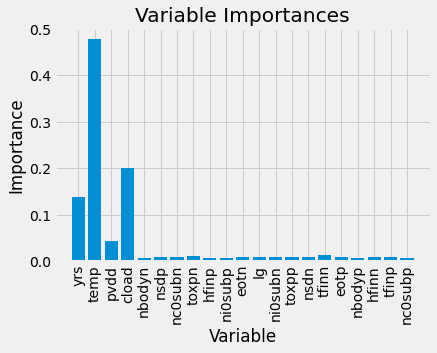

In [100]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, df_delay.columns[:input_columns], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

# Retraining with only the important features

In [104]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 300, criterion='mse',random_state=42)

important_indices = [0,1,2,3]
train_important = X_delay[:, important_indices]
test_important = X_test_delay[:, important_indices]

rf_most_important.fit(train_important, y_delay)

prediction_train = rf_most_important.predict(train_important)
prediction_test = rf_most_important.predict(test_important)

prediction_train2 = scalarY_delay.inverse_transform(prediction_train)
prediction_test2 = scalarY_delay.inverse_transform(prediction_test)

In [105]:
sum=0
count=0
for i in range(train_length):
    for j in range(output_columns):        
        error = abs(prediction_train2[i,j] - y_2_delay[i,j])/(y_2_delay[i,j])
        sum+=error
print("Mean Train Accuracy: {:.2f} %".format(100 - (sum/(train_length*output_columns) * 100)))

Mean Train Accuracy: 95.96 %


In [106]:
sum=0
count=0
for i in range(val_length):
    for j in range(output_columns):  
        error = abs(prediction_test2[i,j] - y_test_delay[i,j])/(y_test_delay[i,j])
        sum+=error    
print("Mean Test Accuracy: {:.2f} %".format(100 - (sum/(val_length*output_columns) * 100)))

Mean Test Accuracy: 88.19 %


In [107]:
tree = rf_most_important.estimators_[5]
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 29
